<a href="https://colab.research.google.com/github/neerajthandayan/Tensorflow-2.0/blob/main/LinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Data investigation

data = load_breast_cancer()
print(type(data),data.keys())

<class 'sklearn.utils.Bunch'> dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [3]:
# Checking dimensions of data
print(data.data.shape, data.target.shape)

(569, 30) (569,)


In [4]:
# Creating A and b variables

A = data.data
b = data.target

In [5]:
# Creating train test split
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,stratify=b)

In [6]:
# Feature Scaling

scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

In [15]:
# Constructing model
cmodel = tf.keras.models.Sequential()

cmodel.add(tf.keras.layers.Dense(1, input_shape=(A_train.shape[1],), activation='sigmoid'))

cmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Fitting model
clf = cmodel.fit(A_train,b_train, validation_data=(A_test,b_test), epochs=100)

Epoch 1/100
15/15 [==============================] - 3s 22ms/step - loss: 0.8649 - accuracy: 0.4795 - val_loss: 0.8019 - val_accuracy: 0.5175
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7645 - accuracy: 0.5963 - val_loss: 0.7252 - val_accuracy: 0.5526
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.7289 - accuracy: 0.5996 - val_loss: 0.6582 - val_accuracy: 0.6404
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6480 - accuracy: 0.6722 - val_loss: 0.6017 - val_accuracy: 0.6579
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6019 - accuracy: 0.6927 - val_loss: 0.5525 - val_accuracy: 0.7105
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5394 - accuracy: 0.7219 - val_loss: 0.5115 - val_accuracy: 0.7456
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5030 - accuracy: 0.7595 - val_loss: 0.4735 - val_accuracy: 0.7719
Epoch 8/100


In [17]:
# Evaluating model

print('Train Accuracy:', cmodel.evaluate(A_train,b_train))
print('Test Accuracy:', cmodel.evaluate(A_test,b_test))

15/15 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9846
Train Accuracy: [0.0907127782702446, 0.9846153855323792]
4/4 [==============================] - 0s 2ms/step - loss: 0.0879 - accuracy: 0.9825
Test Accuracy: [0.08791214972734451, 0.9824561476707458]


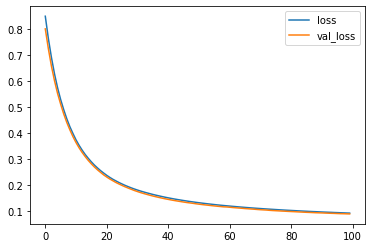

In [22]:
# Plotting model performance

plt.plot(clf.history['loss'], label='loss')
plt.plot(clf.history['val_loss'], label='val_loss')
plt.legend()

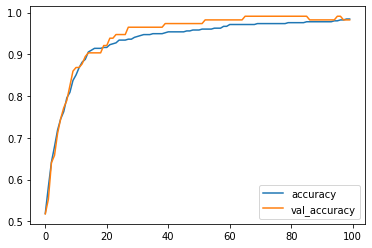

In [23]:
# Plotting model performance

plt.plot(clf.history['accuracy'], label='accuracy')
plt.plot(clf.history['val_accuracy'], label='val_accuracy')
plt.legend()